### Introduction to Multivariate Regression on the Boston House Pricing Dataset 

In this project, I will be implementing Linear Regression models for the Boston House Pricing Dataset from scratch as well as corresponding scikit-learn APIs. 

## Multivariate Linear Regression

In this part, my goal is to implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s.

To do this, we are using a dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data.

A common way to normalize features that I will use different scales and ranges is this:

- Subtract the mean value of each feature from the dataset.

- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

### Implementation from Scratch 

#### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as r

#### Preparing Data

Loading in our data into train and test sets and applying preprocessing steps to cater to missing values, categorical variables etc. 

In [33]:
trainData = np.loadtxt('Task1/trainData.txt')
trainLabels = np.loadtxt('Task1/trainLabels.txt')
testData = np.loadtxt('Task1/testData.txt')
testLabels = np.loadtxt('Task1/testLabels.txt')

print(trainData.shape)
print(trainLabels.shape)
print(testData.shape)
print(testLabels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


#### Normalizing Data

For models like Linear/Logistic Regression, and even for Neural Networks, Standardization/Normalization is a non-negotiable step in the preprocessing stage. You would find your model **broken** if you do not normalize your data.

One nice way to implement this is to create a class, `StandardScaler` that can be used to store the mean and standard deviation of each feature of the training set. The `StandardScaler` class also has two functions, `fit` and `transform`.

- The `fit` function is used to calculate the mean and standard deviation of each feature of the training set. 

- The `transform` function is used to transform all the features using the corresponding mean and standard deviation, i.e. subtracting the mean and dividing by the standard deviation.

A very subtle and important point to note here is that the mean and standard deviation should be calculated only on the training set, and then applied to the test set. This is because in real-world scenarios, we do not have access to the test set, and hence we cannot calculate the mean and standard deviation of the test set.

In [138]:
class StandardScaler:
    
    def __init__ (self):
        
        self.mean = None
        self.sd = None
        
    def fit(self, d):
        
        self.mean = np.mean(d, axis = 0)
        self.sd = np.std(d, axis = 0)
        
    def transform(self, d):
        
        return (d - self.mean) / self.sd
    
    def normalize(self, d):
        
        self.fit(d)
        
        return self.transform(d)
    
standardScaler = StandardScaler()
trainData2 = standardScaler.normalize(trainData)
testData2 = standardScaler.transform(testData)
# testData = standardScaler.normalize(testData)

print(trainData2.shape)
print(testData2.shape)

(404, 13)
(102, 13)


#### Gradient Descent

Now that our data is ready, we can start implementing the gradient descent algorithm. 

We will be creating a class `LinearRegression` with the following methods:

- `__init__`: The constructor of the class. We will initialize any variables, like the learning rate and the number of iterations, here. 

- `fit`: This method will be used to train our model. It should take in the training data and labels as parameters, and learn the parameters using gradient descent. We will save the loss values after every iteration in a list, and return it (for plotting later).

- `predict`: This method will be used to predict the labels for a given set of test data. It should take in the test data as a parameter, and return the predicted labels. 

- `score`: This method will be used to calculate the mean square error for the test data. It should take in the test data and labels as parameters, and return the mean square error. Note that this is a unique case where the loss function and the final reported metric are the same. 

MSE For Train Set =  11.025821703296403
MSE FOr Test Set =  11.528527142598973


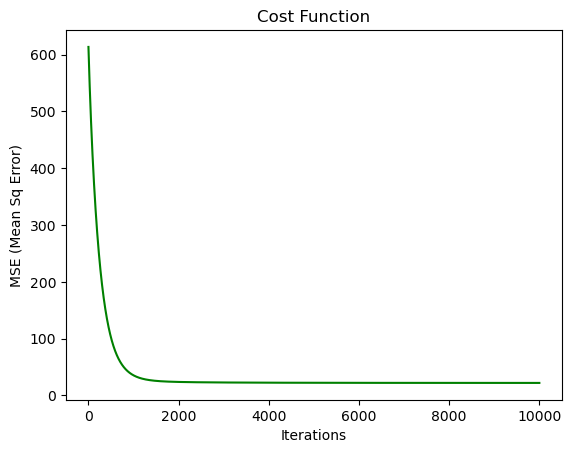

In [171]:
class LinearRegression:
    
    def __init__(self):
        
        self.learningRate = 0.001
        self.iterations = 10000
        self.lossList = []
        self.theta = None
        
    def fit(self, trainData, trainLabels):
        
        bias = np.ones((trainData.shape[0], 1))
        train_new = np.concatenate((bias, trainData), axis=1)
        trainData = train_new

        self.theta = np.zeros((trainData.shape[1], 1))
        
        for i in range(trainData.shape[1]):
            
            self.theta[i] = np.random.randn()

        trainLabels = trainLabels.reshape(-1, 1)

        for i in range(self.iterations):
            
            predictions = np.dot(trainData, self.theta)
            errors = predictions - trainLabels
            gradients = (2/len(trainLabels)) * np.dot(trainData.T, errors)
            self.theta -= self.learningRate * gradients
            MSE = np.mean(errors ** 2)
            self.lossList.append(MSE)
        
        return self.lossList
    
    def predict(self, trainData):
        
        bias = np.ones((trainData.shape[0], 1))
        train_new = np.concatenate((bias, trainData), axis=1)
        trainData = train_new

        return np.dot(trainData, self.theta)
    
    def score(self, trainData, trainLabels):
        
        predictions = self.predict(trainData)
        errors = predictions - trainLabels.reshape(-1, 1)
        MSE = np.mean(errors ** 2)/2
        
        return MSE
    
LR = LinearRegression()

lossList =  LR.fit(trainData2, trainLabels)

plt.plot(range(10000), lossList, 'green')
plt.title('Cost Function')
plt.ylabel('MSE (Mean Sq Error)')
plt.xlabel('Iterations')

trainScore = LR.score(trainData2, trainLabels)
testScore = LR.score(testData2, testLabels)

print("MSE For Train Set = ", trainScore)
print("MSE FOr Test Set = ", testScore)

### Regularized Linear Regression Using Scikit-learn 

Now, I will use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to the Boston house pricing dataset.

we will try out different values of regularization coefficient (known as `alpha` in `sklearn`) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression.

Finally, we will plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the plots shown below.


#### Importing Libraries

In [238]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

#### Linear Regression (using `sklearn`)

In [175]:
LM = LinearRegression()

LM.fit(trainData2, trainLabels)
train_predictions = LM.predict(trainData2)
test_predictions = LM.predict(testData2)

train_mse = mean_squared_error(trainLabels, train_predictions)
test_mse = mean_squared_error(testLabels, test_predictions)

print("MSE For Train Set = ", train_mse)
print("MSE FOr Test Set = ", test_mse)

MSE For Train Set =  22.00480083834814
MSE FOr Test Set =  23.195599256422973


#### Ridge Regression

Alphas :  [1.11469775e-06 1.64325914e-08 1.26794703e+03 7.93166830e-04
 2.12805804e+05 5.05961119e+07 1.28574383e+01 3.43560207e+03
 9.16757872e-04 1.06434709e+07 1.06055835e-07 3.09592460e-04
 5.66187315e-07 3.83974091e-08 4.27506479e-06]
MSEs :  [23.195599152027462, 23.195599254883984, 41.45507718973042, 23.195524975799128, 82.87574947441738, 83.70729449626904, 22.382720199652166, 56.210794769608604, 23.195513401832155, 83.69391722673882, 23.19559924649044, 23.195570262319542, 23.195599203397443, 23.19559925282689, 23.19559885604768]


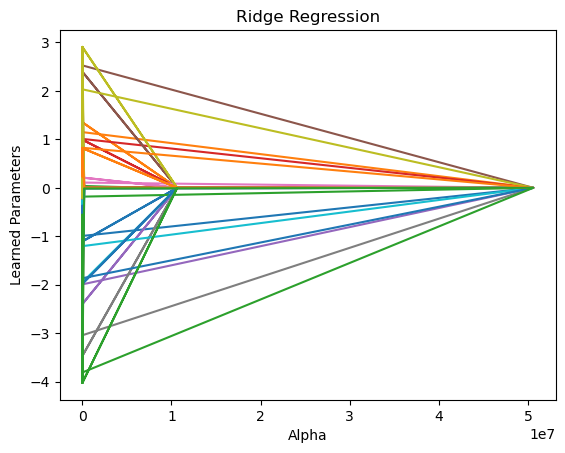

In [237]:
# alphas = [0.001, 0.01, 0.1, 1, 5, 10, 50]
# alphas = np.linspace(0.01, 10, 100)
log_alphas = np.random.uniform(low = -6, high = 6, size = 15)
alphas = np.power(20, log_alphas)
print("Alphas : ", alphas)

MSEs = []
coefficients = []

for a in alphas:
    
    R = Ridge(alpha = a, max_iter = 1000)
    R.fit(trainData2, trainLabels)
    coefficients.append(R.coef_)
#     print(coefficients)
    
    test_predictions = R.predict(testData2)
    MSEs.append(mean_squared_error(testLabels, test_predictions))

for i in range(len(coefficients[0])):
    
    plt.plot(alphas, [c[i] for c in coefficients])
    plt.title('Ridge Regression')
    plt.ylabel('Learned Parameters')
    plt.xlabel('Alpha')
    
print("MSEs : ", MSEs)

#### Lasso Regression

Alphas :  [2.49982944e-01 1.25745020e-01 5.83067803e+03 2.54707839e+07
 2.61953619e+00 3.27410959e+04 3.61039533e-02 1.46721370e+07
 1.47484438e-02 3.24256235e+00 6.63201036e-04 1.17934970e+04
 7.93293505e+04 1.65860808e+03 2.93939708e-02]
MSEs :  [23.195367765269857, 23.195599254421055, 77.4143316977241, 82.9841367512382, 23.195599118870383, 83.63082382009786, 23.195588225885594, 40.870303760576874, 23.195599243503043, 23.195507900102417, 23.150374442672202, 23.195599253492006, 23.195121412015222, 23.195597325446762, 83.5638753544366]


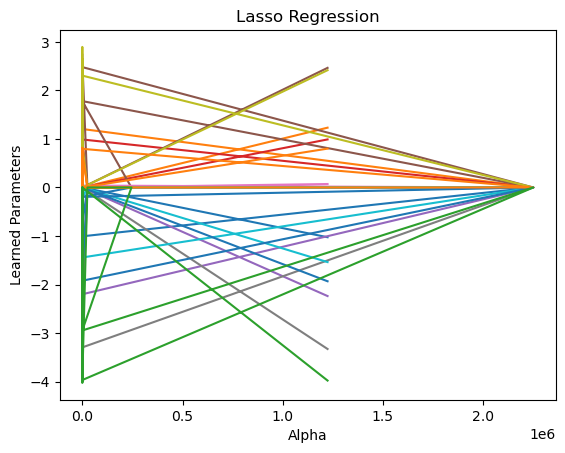

In [236]:
log_alphas_lasso = np.random.uniform(low = -6, high = 6, size = 15)
alphas_lasso = np.power(20, log_alphas_lasso)
print("Alphas : ", alphas_lasso)

MSEs_lasso = []
coefficients_lasso = []

for a in alphas_lasso:
    
    L = Lasso(alpha = a, max_iter = 1000) 
    L.fit(trainData2, trainLabels)
    test_predictions = L.predict(testData2)
    MSEs_lasso.append(mean_squared_error(testLabels, test_predictions))
    coefficients_lasso.append(L.coef_)
    
for i in range(len(coefficients_lasso[0])):
    
    plt.plot(alphas, [c[i] for c in coefficients_lasso])
    plt.title('Lasso Regression')
    plt.ylabel('Learned Parameters')
    plt.xlabel('Alpha')
    
print("MSEs : ", MSEs)

#### Elastic Net Regression (this is a mix of ridge and lasso)

In [247]:
A = 0.25 
L1 = 0.5  # 0 <= l1 ratio <= 1

EN = ElasticNet(alpha = A, l1_ratio = L1, max_iter = 1000)
EN.fit(trainData2, trainLabels)
test_predictions = EN.predict(testData2)
MSE_EN = mean_squared_error(testLabels, test_predictions)


print("Alpha = ", A)
print("L1 Ratio = ", L1)
print("MSE = ", MSE_EN)

Alpha =  0.25
L1 Ratio =  0.5
MSE =  21.786935912774858
